In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/Log In - AgInjuryNews (1).xlsx - Sheet1 (1) - Log In - AgInjuryNews (1).xlsx - Sheet1 (1).csv')

X = pd.DataFrame(dataset.iloc[:,:18].values)
Y = pd.DataFrame(dataset.iloc[:,18:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
X_train, X_train_val, Y_train, Y_train_val = train_test_split(X,Y,test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.reshape(2735,18,1)
X_test.reshape(684,18,1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

features = pd.DataFrame(dataset.iloc[:,:18])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0      3   2   2  25   0   3  10   0   0   0   0   0   0   0   0   0   1   1
1      3   3   1  61   0   3  10   0   0   0   0   0   0   0   0   0   7   1
2      3   3   1  65   0   3  10   0   0   0   0   0   0   0   0   0   6   1
3      3   2   1  49   0   3  10   0   0   0   1   0   0   0   0   0   5   1
4      3   1   1  54   0   5   2   1   1   0   0   0   0   0   0   1   5   1
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
3414   1   2   1  57   0   6   7   0   0   0   0   0   0   0   0   0   1   4
3415   1   1   1  24   0   3   7   0   0   0   0   0   0   0   0   0   1   4
3416   1   1   1  50   0   3  10   0   0   0   0   0   0   0   0   0   6   4
3417   1   2   1  58   0   3   9   0   0   0   0   0   0   0   0   0   6   4
3418   1   2   1   3   0   4  10   0   0   0   0   0   0   0   0   0   5   4

[3419 rows x 18 columns]
      0
0     0
1     1
2     1
3     0
4     1
..

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam
from keras import layers

In [3]:
model = Sequential()

# First SimpleRNN layer
model.add(SimpleRNN(128, input_shape=(18, 1), return_sequences=True))
model.add(Dropout(0.5))

# Second SimpleRNN layer
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.5))

# Third SimpleRNN layer
model.add(SimpleRNN(32, return_sequences=False))  # This will output a single vector for the next layer
model.add(Dropout(0.5))

# Dense layer with more units
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,Y_train,epochs = 1000,batch_size=128)


Epoch 1/1000


22/22 [==============================] - 4s 20ms/step - loss: 0.7138 - accuracy: 0.5616
Epoch 2/1000
22/22 [==============================] - 0s 21ms/step - loss: 0.7152 - accuracy: 0.5576
Epoch 3/1000
22/22 [==============================] - 0s 21ms/step - loss: 0.7015 - accuracy: 0.5795
Epoch 4/1000
22/22 [==============================] - 0s 22ms/step - loss: 0.6907 - accuracy: 0.5883
Epoch 5/1000
22/22 [==============================] - 0s 22ms/step - loss: 0.6848 - accuracy: 0.5843
Epoch 6/1000
22/22 [==============================] - 0s 22ms/step - loss: 0.6758 - accuracy: 0.6007
Epoch 7/1000
22/22 [==============================] - 0s 21ms/step - loss: 0.6728 - accuracy: 0.6048
Epoch 8/1000
22/22 [==============================] - 0s 20ms/step - loss: 0.6804 - accuracy: 0.6004
Epoch 9/1000
22/22 [==============================] - 1s 26ms/step - loss: 0.6780 - accuracy: 0.5982
Epoch 10/1000
22/22 [==============================] - 0s 23ms/step - loss: 0.6720 - acc

In [6]:
model.fit(X_train,Y_train,epochs = 1000,batch_size=128)

Epoch 1/1000
22/22 [==============================] - 0s 17ms/step - loss: 0.5531 - accuracy: 0.7027
Epoch 2/1000
22/22 [==============================] - 0s 12ms/step - loss: 0.5469 - accuracy: 0.7097
Epoch 3/1000
22/22 [==============================] - 0s 13ms/step - loss: 0.5413 - accuracy: 0.7188
Epoch 4/1000
22/22 [==============================] - 0s 13ms/step - loss: 0.5441 - accuracy: 0.7104
Epoch 5/1000
22/22 [==============================] - 0s 12ms/step - loss: 0.5404 - accuracy: 0.7002
Epoch 6/1000
22/22 [==============================] - 0s 12ms/step - loss: 0.5319 - accuracy: 0.7155
Epoch 7/1000
22/22 [==============================] - 0s 12ms/step - loss: 0.5310 - accuracy: 0.7199
Epoch 8/1000
22/22 [==============================] - 0s 12ms/step - loss: 0.5232 - accuracy: 0.7221
Epoch 9/1000
22/22 [==============================] - 0s 12ms/step - loss: 0.5225 - accuracy: 0.7236
Epoch 10/1000
22/22 [==============================] - 0s 12ms/step - loss: 0.5495 - accura

In [4]:
res = model.predict(X_test)
res.round()
actual = []
for num in res:
    if num>0.5:
        actual.append(1)
    else:
        actual.append(0)
from sklearn.metrics import classification_report
print(classification_report(Y_test,actual,digits=6))

22/22 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0   0.731343  0.384314  0.503856       255
           1   0.714545  0.916084  0.802860       429

    accuracy                       0.717836       684
   macro avg   0.722944  0.650199  0.653358       684
weighted avg   0.720808  0.717836  0.691389       684



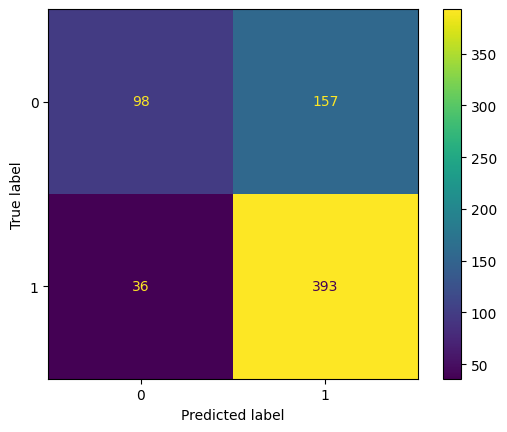

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, actual)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()